# <u>**ML Mini Project-2**</u>

## Predicting Student Exam Scores

In [18]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [19]:
df = pd.read_csv('student-mat.csv',sep=";")

In [20]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [21]:
print(df.head())
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (to

In [22]:
# One-hot encode categorical columns
df = pd.get_dummies(df, drop_first=True)

# Features & target
X = df.drop("G3", axis=1)
y = df["G3"]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


In [24]:
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

MAE: 1.6466656197147518
RMSE: 2.3783697847961376
R² Score: 0.7241341236974019


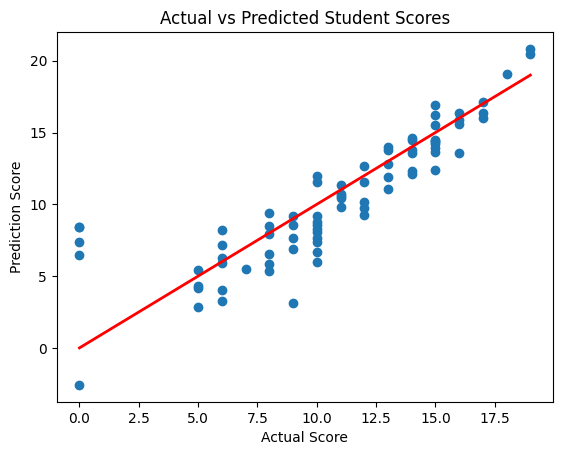

In [25]:
plt.scatter(y_test, y_pred)
plt.title("Actual vs Predicted Student Scores")
line_x = np.linspace(y_test.min(), y_test.max(), 100)
line_y = line_x  # For perfect predictions, y_pred = y_test
plt.plot(line_x, line_y, color='red', linewidth=2)  # Perfect fit line
plt.ylabel('Prediction Score')
plt.xlabel('Actual Score')
plt.show()

## Model comparison – Linear Regression vs Random Forest

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    return mae, rmse, r2

In [27]:
# Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
mae_lr, rmse_lr, r2_lr = evaluate_model(lr, X_train, y_train, X_test, y_test)

# Random Forest
rf = RandomForestRegressor(random_state=42)
mae_rf, rmse_rf, r2_rf = evaluate_model(rf, X_train, y_train, X_test, y_test)

print("Linear Regression -> MAE:", mae_lr, "RMSE:", rmse_lr, "R²:", r2_lr)
print("Random Forest -> MAE:", mae_rf, "RMSE:", rmse_rf, "R²:", r2_rf)

Linear Regression -> MAE: 1.6466656197147518 RMSE: 2.3783697847961376 R²: 0.7241341236974019
Random Forest -> MAE: 1.1645569620253164 RMSE: 1.9487730641858232 R²: 0.8147911386865877


## Step 2 – Regularization (Ridge & Lasso)

In [28]:
from sklearn.linear_model import Ridge, Lasso

ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.01)

mae_ridge, rmse_ridge, r2_ridge = evaluate_model(ridge, X_train, y_train, X_test, y_test)
mae_lasso, rmse_lasso, r2_lasso = evaluate_model(lasso, X_train, y_train, X_test, y_test)

print("Ridge Regression -> MAE:", mae_ridge, "RMSE:", rmse_ridge, "R²:", r2_ridge)
print("Lasso Regression -> MAE:", mae_lasso, "RMSE:", rmse_lasso, "R²:", r2_lasso)


Ridge Regression -> MAE: 1.6353719773948039 RMSE: 2.369006310817141 R²: 0.7263019769073291
Lasso Regression -> MAE: 1.5796470113816494 RMSE: 2.318419272790069 R²: 0.7378661041754626


## Step 3 – Feature Importance

In [29]:
# For Linear Regression
feature_importance_lr = pd.Series(lr.coef_, index=X.columns).sort_values(ascending=False)
print("\nLinear Regression Coefficients:\n", feature_importance_lr)

# For Random Forest
feature_importance_rf = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nRandom Forest Feature Importance:\n", feature_importance_rf.head(10))



Linear Regression Coefficients:
 G2                   0.957772
schoolsup_yes        0.785652
Fjob_health          0.481242
higher_yes           0.375377
sex_M                0.374410
famrel               0.314962
reason_other         0.304973
G1                   0.211699
Fjob_other           0.206441
famsup_yes           0.203656
goout                0.189859
Mjob_teacher         0.099152
guardian_mother      0.095304
school_MS            0.093814
traveltime           0.088593
Medu                 0.086317
address_U            0.082612
paid_yes             0.067222
absences             0.055593
Walc                 0.053906
health               0.044027
studytime           -0.007743
famsize_LE3         -0.008772
freetime            -0.020226
Mjob_services       -0.051643
Fjob_teacher        -0.068291
age                 -0.115927
Pstatus_T           -0.140394
guardian_other      -0.149291
Fedu                -0.167378
internet_yes        -0.168204
Dalc                -0.185509
reason

## Step 4 – G1 & G2 Removal Test

In [33]:
X_no_prev = X.drop(["G1", "G2"], axis=1)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_no_prev, y, test_size=0.2, random_state=42)

mae_lr_no_prev, rmse_lr_no_prev, r2_lr_no_prev = evaluate_model(LinearRegression(), X_train2, y_train2, X_test2, y_test2)
mae_rf_no_prev, rmse_rf_no_prev, r2_rf_no_prev = evaluate_model(RandomForestRegressor(random_state=42), X_train2, y_train2, X_test2, y_test2)

print("\nWithout G1 & G2:")
print("Linear Regression -> MAE:", mae_lr_no_prev, "RMSE:", rmse_lr_no_prev, "R²:", r2_lr_no_prev)
print("Random Forest -> MAE:", mae_rf_no_prev, "RMSE:", rmse_rf_no_prev, "R²:", r2_rf_no_prev)



Without G1 & G2:
Linear Regression -> MAE: 3.39526092580192 RMSE: 4.1956808027213786 R²: 0.14149247411195787
Random Forest -> MAE: 3.1477215189873418 RMSE: 3.9353858801033046 R²: 0.24470976229175112


## 1. Feature Importance Bar Charts



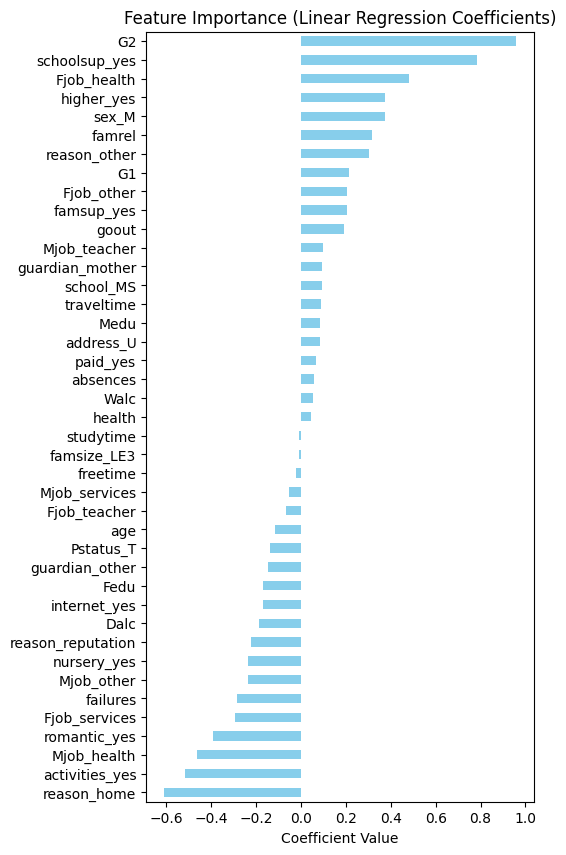

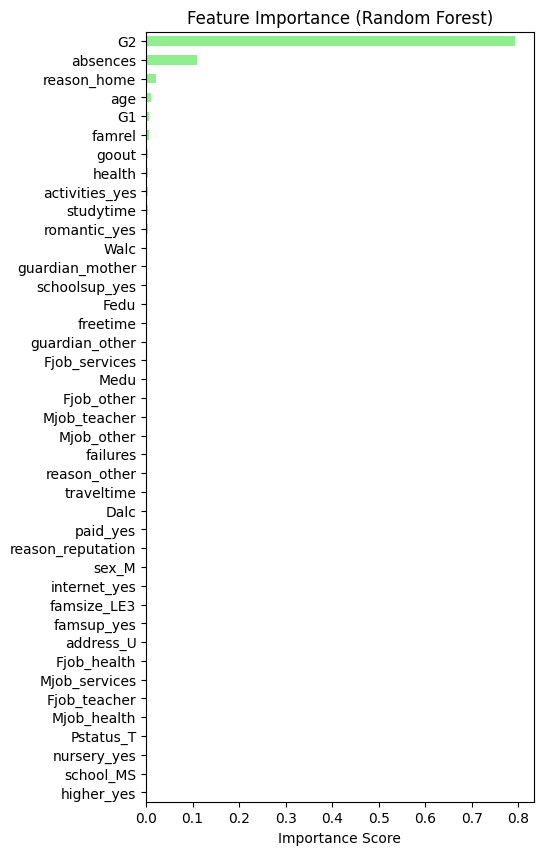

In [37]:
import matplotlib.pyplot as plt

# Linear Regression Feature Importance
plt.figure(figsize=(5,10))
feature_importance_lr.sort_values().plot(kind='barh', color='skyblue')
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.xlabel("Coefficient Value")
plt.show()

# Random Forest Feature Importance
plt.figure(figsize=(5,10))
feature_importance_rf.sort_values().plot(kind='barh', color='lightgreen')
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.show()


## 2. Actual vs Predicted Scatter Plots


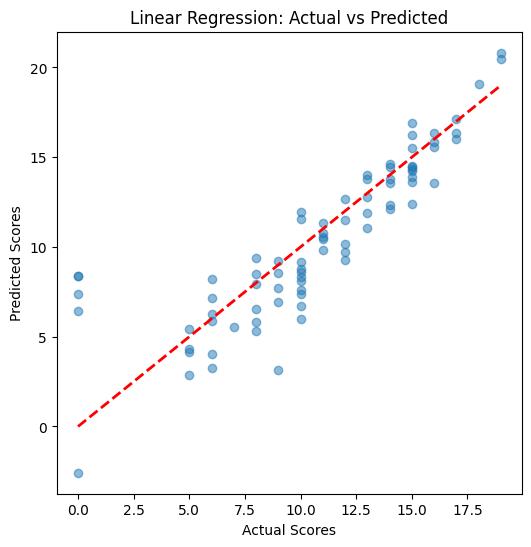

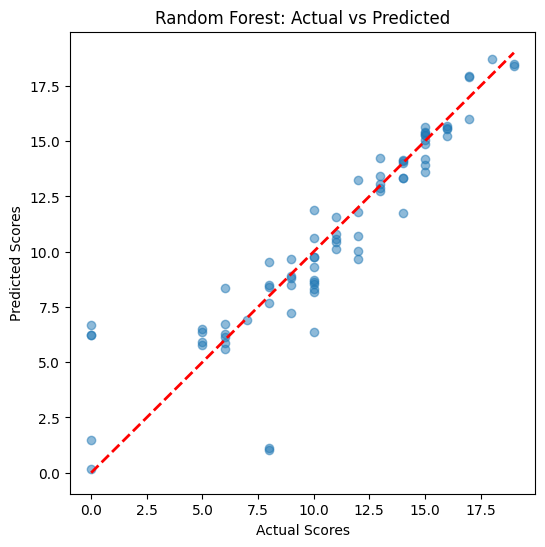

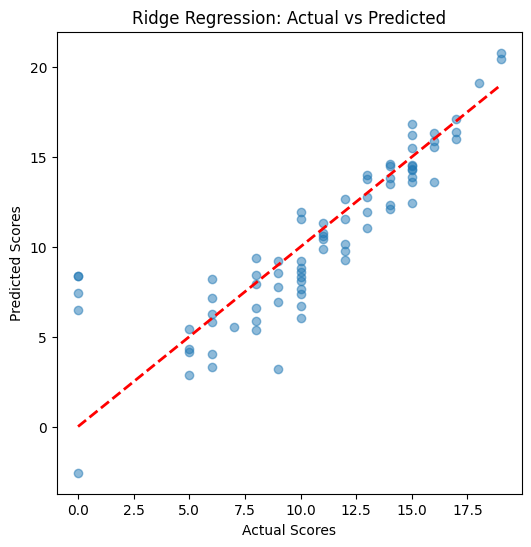

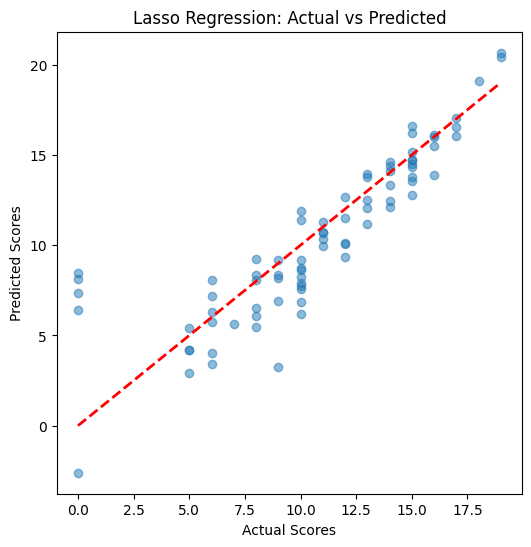

In [38]:
def plot_actual_vs_pred(y_test, y_pred, title):
    plt.figure(figsize=(6,6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # perfect prediction line
    plt.xlabel("Actual Scores")
    plt.ylabel("Predicted Scores")
    plt.title(title)
    plt.show()

# For all models
plot_actual_vs_pred(y_test, lr.predict(X_test), "Linear Regression: Actual vs Predicted")
plot_actual_vs_pred(y_test, rf.predict(X_test), "Random Forest: Actual vs Predicted")
plot_actual_vs_pred(y_test, ridge.predict(X_test), "Ridge Regression: Actual vs Predicted")
plot_actual_vs_pred(y_test, lasso.predict(X_test), "Lasso Regression: Actual vs Predicted")


## 3. Side-by-Side Metrics Table

               Model    MAE   RMSE  R² Score
0  Linear Regression  1.647  2.378     0.724
1      Random Forest  1.165  1.949     0.815
2   Ridge Regression  1.635  2.369     0.726
3   Lasso Regression  1.580  2.318     0.738


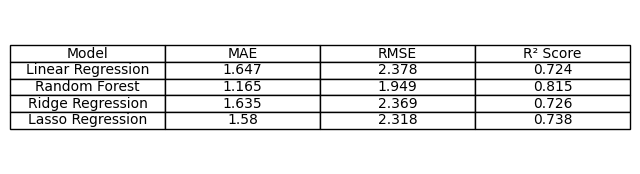

In [39]:
# Gather metrics into DataFrame
metrics_df = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "Ridge Regression", "Lasso Regression"],
    "MAE": [mae_lr, mae_rf, mae_ridge, mae_lasso],
    "RMSE": [rmse_lr, rmse_rf, rmse_ridge, rmse_lasso],
    "R² Score": [r2_lr, r2_rf, r2_ridge, r2_lasso]
})

# Round for readability
metrics_df = metrics_df.round(3)

print(metrics_df)

# Optional: visual table
plt.figure(figsize=(8,2))
plt.axis('off')
plt.table(cellText=metrics_df.values, colLabels=metrics_df.columns, loc='center', cellLoc='center')
plt.show()
